# Credit risk prediction

## Introduction

In today's financial landscape, understanding and predicting creditworthiness is of paramount importance for financial institutions, lenders, and even individuals managing their own finances. A key metric used to assess creditworthiness is the **credit score**, which is a numerical representation of an individual's credit risk based on various financial factors. This predictive model can help financial institutions make informed decisions about lending, interest rates, and credit limits. 

The objective of this project is to build a **machine learning model** capable of predicting an individual’s **credit score** classification—whether it is **Poor**, **Standard**, or **Good**—based on a variety of financial and personal information. By leveraging historical data, the model will learn patterns and correlations that could help predict future credit scores, thereby assisting in assessing the risk associated with lending to different customers.

## Dataset Overview

The dataset used in this project is the **Credit Score Classification** dataset, which can be accessed via Kaggle at the following link: [Credit Score Classification Dataset](https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification). The dataset includes multiple attributes that provide comprehensive insights into an individual's financial situation. It covers details about personal information, financial history, and credit usage behavior.

The dataset includes the following variables:

- **ID**: A unique identification for each entry in the dataset.
- **Customer_ID**: A unique identifier for each customer.
- **Month**: The month of the year in which the data is recorded.
- **Name**: The name of the individual.
- **Age**: The age of the individual.
- **SSN**: Social Security Number (used for identification purposes).
- **Occupation**: The individual's occupation.
- **Annual_Income**: The total annual income of the individual.
- **Monthly_Inhand_Salary**: The monthly base salary of the individual.
- **Num_Bank_Accounts**: The number of bank accounts the individual holds.
- **Num_Credit_Card**: The number of credit cards the individual holds.
- **Interest_Rate**: The interest rate on the individual's credit cards.
- **Num_of_Loan**: The number of loans the individual has taken.
- **Type_of_Loan**: The types of loans the individual has taken.
- **Delay_from_due_date**: The average number of days the individual has delayed payments past their due date.
- **Num_of_Delayed_Payment**: The total number of delayed payments made by the individual.
- **Changed_Credit_Limit**: The percentage change in the individual's credit card limit.
- **Num_Credit_Inquiries**: The number of times the individual has inquired about credit.
- **Credit_Mix**: A classification of the individual's mix of credit types (e.g., revolving, installment).
- **Outstanding_Debt**: The total remaining debt (in USD) the individual owes.
- **Credit_Utilization_Ratio**: The ratio of the individual's credit utilization.
- **Credit_History_Age**: The length of the individual's credit history.
- **Payment_of_Min_Amount**: Whether the individual has paid only the minimum required amount on their credit cards.
- **Total_EMI_per_month**: The total monthly EMI (equated monthly installment) payments.
- **Amount_invested_monthly**: The total monthly investment by the individual.
- **Payment_Behaviour**: The individual's payment behavior and habits.
- **Monthly_Balance**: The individual's balance amount for the month.
- **Credit_Score**: The target variable representing the credit score classification of the individual (Poor, Standard, or Good).

## Problem Context

The **credit score classification** model aims to predict the credit score of an individual based on these attributes. The credit score is a critical factor in determining an individual's financial health, influencing their eligibility for loans, credit cards, and even mortgages. Financial institutions utilize these predictions to assess risk and determine appropriate interest rates or whether they should offer credit at all.

By applying machine learning algorithms to this dataset, the goal is to accurately predict the credit score bracket (Poor, Standard, or Good) of an individual based on their financial behavior and demographic information. This can be particularly beneficial for:
- **Lenders**, who can use the model to make more informed decisions about offering loans.
- **Financial analysts**, who can gain deeper insights into the factors that most influence an individual’s creditworthiness.
- **Consumers**, who can understand the key financial behaviors affecting their credit scores and work on improving them.

## 1. Setup and Library Imports


The first step in any project is to import the libraries that provide the functionalities we’ll need, including data manipulation, visualization, machine learning, and model evaluation.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Explainability
import shap

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Load the data


Here, we load the datasets, <b>credit_train.csv</b> and <b>credit_test.csv</b>, which contain information about customers and their credit scores. The train_data will be used for model training, while test_data is for final model testing.

In [3]:
# Load dataset
data = pd.read_csv('credit_train.csv')

# Display the first few rows of the data
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## 3. Data Exploration

In this section, we analyze the structure, data types, distributions, and values within our dataset to understand the underlying patterns. This is crucial for identifying any data cleaning or preprocessing steps needed before model building.

<b> Initial Data Analysis </b>



In [5]:
# Display the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

The training dataset has 100,000 entries and 28 columns, each containing information on a customer’s credit-related data. 
No columns have missing values, based on the non-null counts for each column.

Duplicate rows can impact model training, so let’s check if there are any in the dataset.

In [7]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 0


To understand the distribution of numerical features, we generate summary statistics.

In [9]:
# Display summary statistics for numerical columns 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


The summary statistics offer some important insights:

* <b>Age</b>: The Age feature ranges from 14 to 56, with a mean of 33.32. There is no indication of extreme values, so we can assume that the Age values are reasonable.
* <b>Annual_Income</b>: The mean is around 50,500, but the standard deviation is 38,299, indicating a wide distribution with some extreme values.
* <b>Monthly_Inhand_Salary</b>: Ranges from 303 to 15,204, with a mean of 4,197. The distribution seems reasonable, but salary values close to 0 should be further investigated.
* <b>Num_Bank_Accounts</b>: The average number of bank accounts is 5.37, and the range is from 0 to 11, which appears acceptable.
* <b>Num_Credit_Card</b>: The average is 5.53, which seems normal.
* <b>Outstanding_Debt</b>: The mean is 1,426 with a range from 0.23 to 4,998. This is another column where outliers may need to be capped.
* <b>Monthly_Balance</b>: The average is 392.70 with a wide standard deviation of 201.65. Outliers at the upper end (around 800) need attention.

<b> Target Variable Distribution </b>

Understanding the distribution of our target variable (<b>Credit_Score</b>) is essential, as this reveals any class imbalances. Here, we plot the frequency of each credit score category to see if any classes are under- or overrepresented.

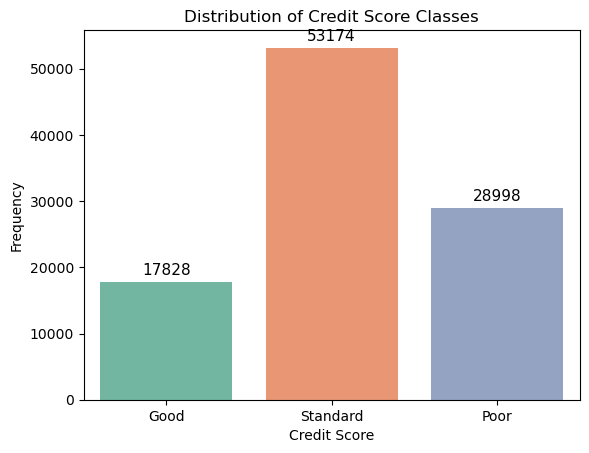

In [9]:
sns.countplot(x='Credit_Score', data=data, palette="Set2")  
plt.title("Distribution of Credit Score Classes")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

The distribution of the target variable (<b>Credit_Score</b>) indicates that the dataset is imbalanced, with the majority of customers being classified as <b>Standard</b>. We need to address this issue in future steps, especially during model training. 

Outliers in certain columns could affect the performance of some machine learning models, so let’s visualize a few key columns to identify potential outliers.

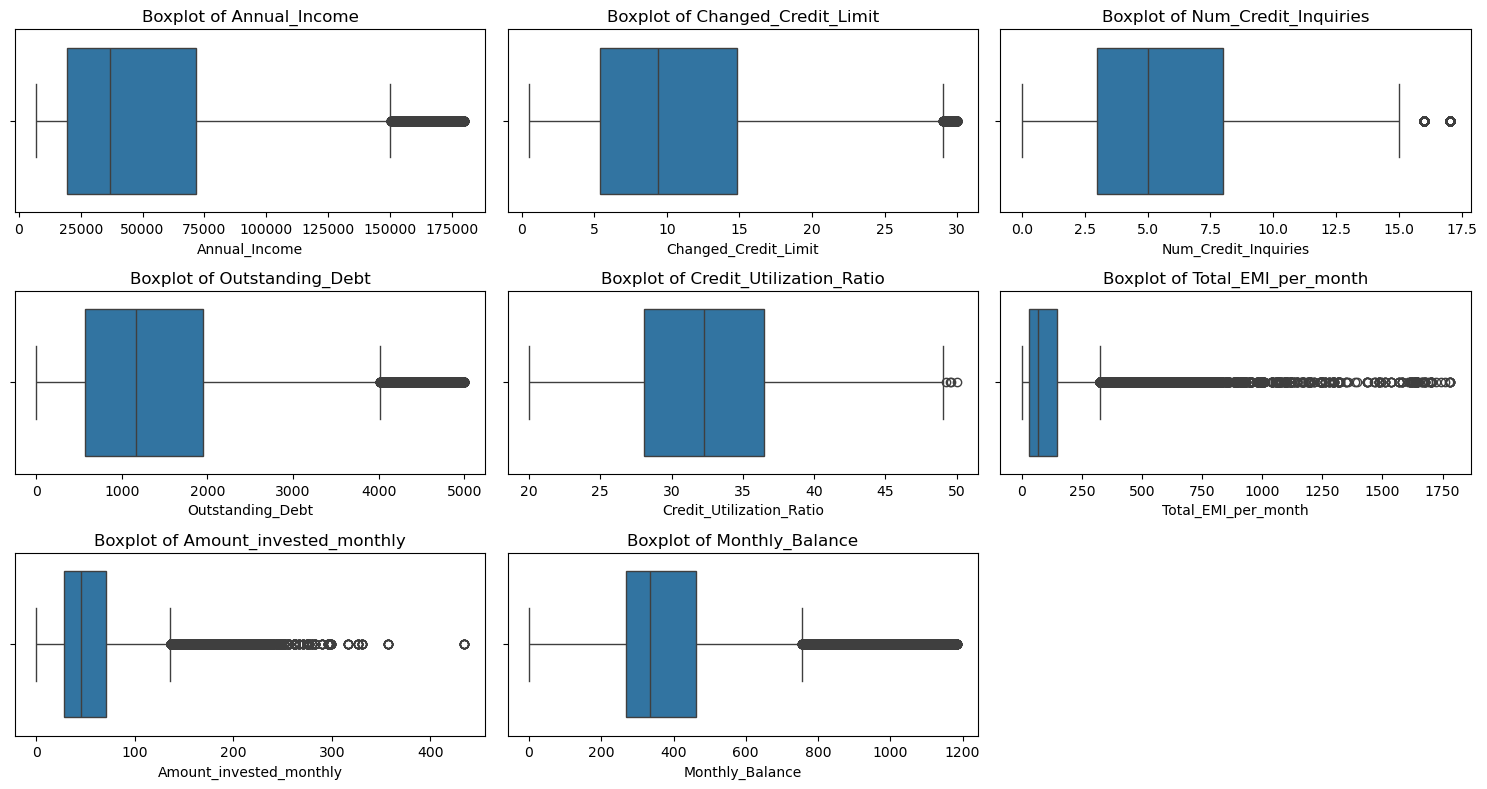

In [11]:
# Visualizing outliers in numerical columns
numerical_cols = ['Annual_Income', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

<b>Some observations</b>:

* <b>Annual_Income</b>: There are outliers above 150,000. These could represent rare high-income individuals, and depending on the model, we may decide to either cap these values or use a transformation (e.g., log) to reduce their impact.
* <b>Outstanding_Debt</b>: Outliers are observed beyond 4,000. Similarly, we can decide whether to cap or transform this variable.
* <b>Total_EMI_per_month</b>: There are outliers in the Total_EMI_per_month feature, specifically above the value of 300. These values represent customers with potentially very high monthly EMI obligations.
* <b>Amount_invested_monthly</b>: The variable Amount_invested_monthly shows outliers above 140. These values might reflect customers with unusually high investment behaviors.
* <b>Monthly_Balance</b>: Outliers are present just before 800. We can inspect if these are valid high balances or errors, but capping could be a solution for extreme cases.

Some columns, like Occupation, Credit_Mix, and Payment_Behaviour, are categorical and might need encoding before being used in a machine learning model. First, we’ll see how many unique values each has.

In [13]:
# Checking unique values in categorical columns
categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for col in categorical_cols:
    print(f"{col} has {data[col].nunique()} unique values")
    print(data[col].value_counts())
    print("\n")

Occupation has 15 unique values
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


Type_of_Loan has 6261 unique values
Type_of_Loan
No Data                                                                                    11408
not specified                                                                               1408
credit-builder loan                                                                         1280
personal loan                                                                               1272
debt consolidation loan                                                                     1264
                                                                 

* <b>Occupation</b>: We could either one-hot encode or apply target encoding, depending on the model. One-hot encoding might result in many columns, so target encoding (replacing categories with mean target values) could be more efficient.
* <b>Type_of_Loan</b>: Due to a large number of unique values, we could either group similar types or use techniques like Frequency Encoding.
* <b>Credit_Mix</b>, <b>Payment_of_Min_Amount</b>, <b>Payment_Behaviour</b>: These can be one-hot encoded or label encoded since they have a manageable number of categories.

## 4. Data Preprocessing

Data preprocessing is essential to prepare the dataset for machine learning models. Below are the key steps to preprocess the dataset effectively.

<b>Removing Unnecessary Columns</b>

We're going to remove a few variables that we won't need to build the model. 

In [15]:
# Dropping irrelevant columns
data = data.drop(columns=['ID', 'Name', 'SSN', 'Type_of_Loan'])

<b> Handle Outliers </b>

Based on the exploration of the dataset, certain columns contain outliers (e.g., Annual_Income, Outstanding_Debt, Monthly_Balance). Outliers can skew model predictions, so we can either cap, transform, or remove them.

In [17]:
# Capping the outliers for the columns in training data
data['Annual_Income'] = data['Annual_Income'].clip(upper=150000)
data['Outstanding_Debt'] = data['Outstanding_Debt'].clip(upper=4000)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].clip(upper=140)
data['Total_EMI_per_month'] = data['Total_EMI_per_month'].clip(upper=140)
data['Monthly_Balance'] = data['Monthly_Balance'].clip(upper=760)

<b>Encoding Categorical Variables</b>

Machine learning models generally require numerical input, so we convert categorical features to numeric values using LabelEncoder. For the target variable Credit_Score, we also encode the labels to numeric classes

In [19]:
# define categorical features
cat_features = data.select_dtypes(include=['object']).columns

# Encode categorical variables with Label Encoding
le = LabelEncoder()

for col in cat_features:
    data[col] = le.fit_transform(data[col])

In [21]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,3392,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


<b> Feature Scaling </b>

We apply scaling to numerical features to bring them to a similar range, which helps improve the performance of models sensitive to feature scales, like Logistic Regression and K-Nearest Neighbors.

In [23]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
num_features = data.select_dtypes(include=['int64', 'float64']).columns
num_features = num_features[num_features != 'Credit_Score']  # Exclude 'Credit_Score' from scaling

data[num_features] = scaler.fit_transform(data[num_features])

In [25]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.575309,-1.527525,-0.958344,1.171861,-0.831544,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,...,-0.274417,-0.543309,-1.067562,0.439200,-0.58149,-0.482153,-0.944738,-0.421386,-0.400276,0
1,-1.575309,-1.091089,-0.958344,1.171861,-0.831544,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,...,-0.274417,-0.543309,-0.066489,0.449232,-0.58149,-0.482153,-0.944738,0.117567,-0.561634,0
2,-1.575309,-0.654654,-0.958344,1.171861,-0.831544,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,...,-0.274417,-0.543309,-0.718376,0.459264,-0.58149,-0.482153,-0.944738,0.656520,-0.291897,0
3,-1.575309,-0.218218,-0.958344,1.171861,-0.831544,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,...,-0.274417,-0.543309,-0.177318,0.469296,-0.58149,-0.482153,-0.944738,1.195473,-0.915899,0
4,-1.575309,0.218218,-0.958344,1.171861,-0.831544,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,...,-0.274417,-0.543309,-1.463366,0.479328,-0.58149,-0.482153,-0.944738,-0.960338,-0.232372,0


<b> Handling Class Imbalance </b>

Since the target variable Credit_Score has an imbalanced distribution (with more instances of the "Standard" class), we need to handle this imbalance. Common strategies include oversampling the minority classes, undersampling the majority class, or adjusting class weights in the model.

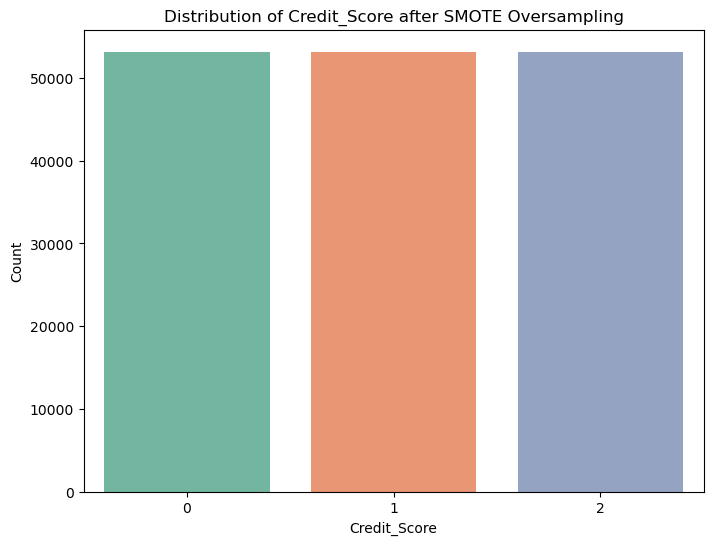

In [27]:
# Define features (X) and target variable (y) in training data
X = data.drop('Credit_Score', axis=1)  # Features for train
y = data['Credit_Score']  # Target variable

# Applying SMOTE for oversampling the minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resample, y_resample = smote.fit_resample(X, y)

# Check the new class distribution
plt.figure(figsize=(8,6))
sns.countplot(x=y_resample, palette='Set2')
plt.title('Distribution of Credit_Score after SMOTE Oversampling')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

 <b>Feature Selection</b>

After preprocessing, it’s important to perform feature selection to identify the most relevant features for your model. Techniques such as Correlation Matrix, Chi-Square Test, or Recursive Feature Elimination (RFE) can be used.

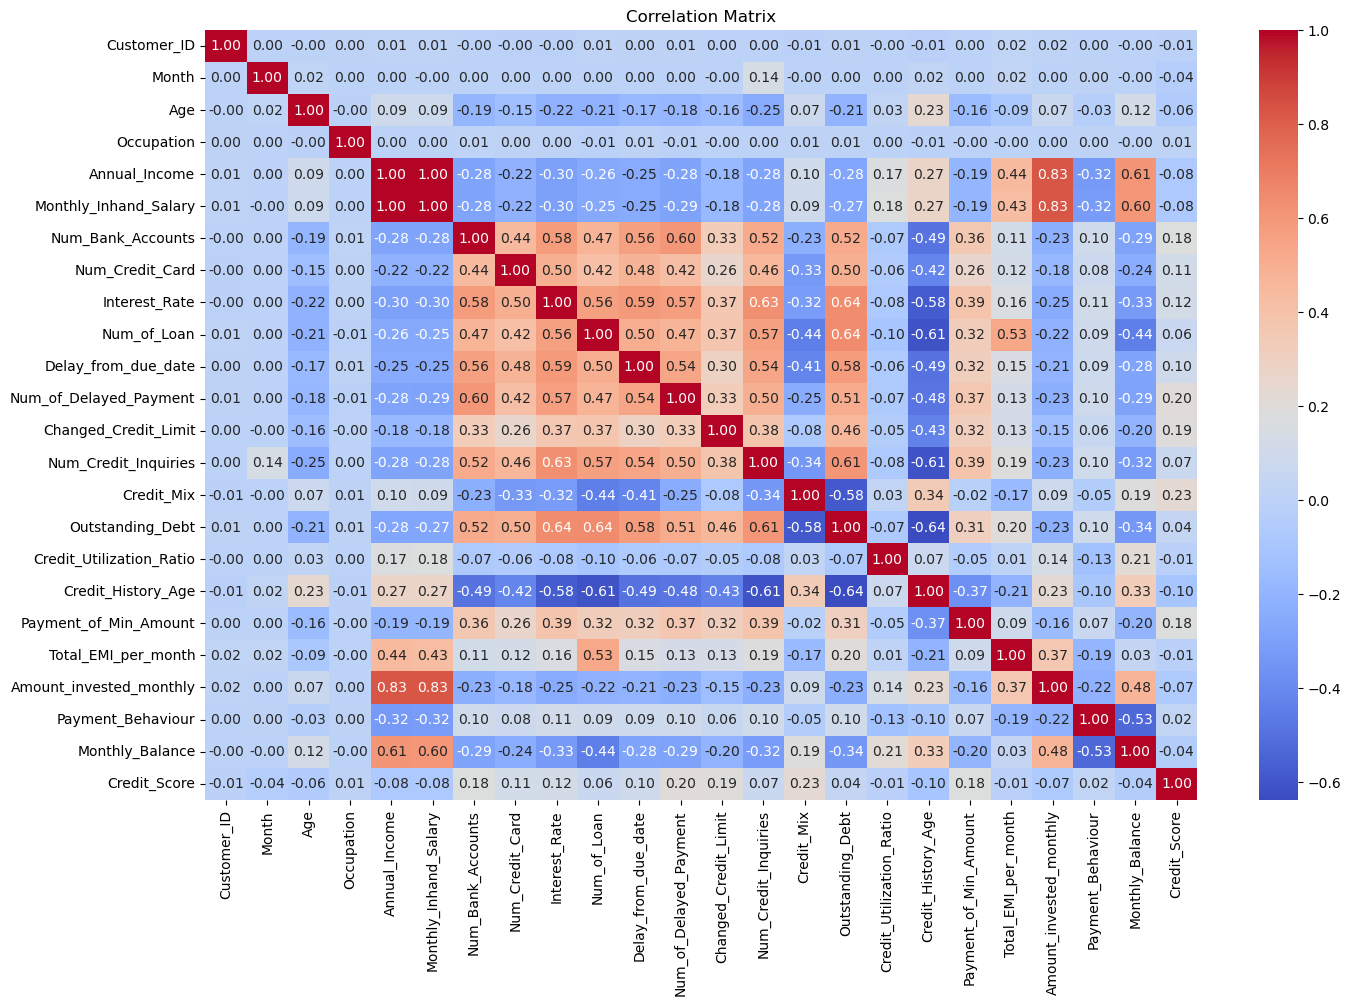

In [29]:
# Now calculate the correlation matrix including the encoded 'Credit_Score'
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Based on the correlation matrix and the relevance of each variable to predicting or explaining credit-related behavior, we can select the following key variables for model development and analysis:

1. **Annual_Income** and **Monthly_Inhand_Salary** – These are highly correlated but significant for assessing an individual's income stability. We might select only one of these to avoid multicollinearity, likely `Annual_Income`.

2. **Credit_History_Age** – Strong negative correlations with `Outstanding_Debt` and `Interest_Rate` indicate its importance in understanding credit behavior and its potential impact on `Credit_Score`.

3. **Outstanding_Debt** – Given its positive relationship with `Num_of_Loan` and `Interest_Rate`, it can serve as a key indicator of an individual’s debt load, influencing their risk profile.

4. **Total_EMI_per_month** – Correlated with `Annual_Income` and relevant for understanding monthly financial obligations, which is essential for credit risk assessments.

5. **Num_of_Loan** and **Num_Bank_Accounts** – These variables represent loan dependency and banking behavior, which could indicate financial habits and access to credit.

6. **Credit_Mix** – Directly correlated with `Credit_Score`, this variable indicates the diversity of credit types, which is valuable for understanding credit management.

7. **Interest_Rate** – Shows relationships with other financial indicators and impacts creditworthiness.

8. **Credit_Utilization_Ratio** – This is often a predictor of credit health, as a high utilization ratio can negatively impact credit scores.

9. **Payment_of_Min_Amount** – This variable could indicate risky credit behavior, with correlations that hint at conservative credit management practices.

10. **Monthly_Balance** – Provides insight into monthly cash flow and financial resilience, which may correlate with creditworthiness.

By focusing on these variables, we capture a well-rounded view of income, debt, credit behavior, and account management factors that likely impact `Credit_Score`.

## 5. Model Building and Evaluation

After completing data preprocessing and analyzing feature correlations, the next step is to build and train machine learning models to predict Credit_Score.

In [33]:
# Select features and target variable
selected_features = [ 'Annual_Income', 'Credit_History_Age', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Bank_Accounts', 
                     'Credit_Mix', 'Interest_Rate', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Monthly_Balance']

# X: Feature matrix, y: Target variable
X_selected = X_resample[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resample, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Fit models and compare their performance
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {"accuracy": accuracy, "classification_report": report, "confusion_matrix": cm}

# Display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:\n", result['classification_report'])

Model: Logistic Regression
Accuracy: 0.6932
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76     10710
           1       0.75      0.64      0.69     10578
           2       0.64      0.60      0.62     10617

    accuracy                           0.69     31905
   macro avg       0.69      0.69      0.69     31905
weighted avg       0.69      0.69      0.69     31905

Model: Random Forest
Accuracy: 0.8690
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     10710
           1       0.87      0.88      0.88     10578
           2       0.86      0.79      0.82     10617

    accuracy                           0.87     31905
   macro avg       0.87      0.87      0.87     31905
weighted avg       0.87      0.87      0.87     31905

Model: Decision Tree
Accuracy: 0.8124
Classification Report:
               precision    recall  f1-score   

Based on the results, Random Forest is clearly the best-performing model, with the highest accuracy (0.869) and strong F1-scores across all classes. It is the most reliable classifier among the models tested.

Once we have an understanding of the performance of each model, we can focus on hyperparameter tuning, especially for more complex models like Random Forest. Hyperparameter tuning helps optimize the model's performance by finding the best parameters (such as the number of trees in a Random Forest.

In [35]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the best model
best_rf_accuracy = best_rf.score(X_test, y_test)
print("Test accuracy with tuned parameters: ", best_rf_accuracy)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 2.7min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  51.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.7min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  51.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 2.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estim

The best parameters obtained for the Random Forest model are as follows: 

{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

With these optimized parameters, the test accuracy of the model is <b>87.3%</b>, which is solid, especially for complex classification problems.

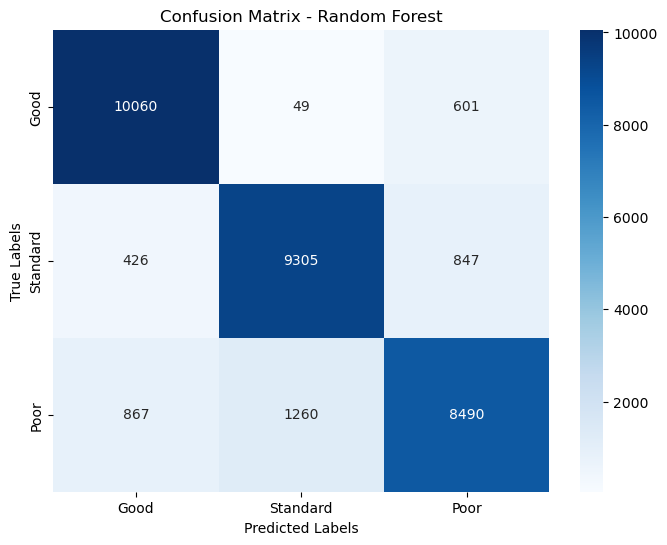

In [35]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Good','Standard','Poor'], yticklabels=['Good','Standard','Poor'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Interpretation:
- **Class Good** :
  - The model correctly predicted 10,060 examples of Class Good.
  - It incorrectly classified 49 examples of Class Good as Class Standard and 601 examples as Class Poor.

- **Class Standard** :
  - 9,305 examples of Class Standard were correctly classified.
  - However, 426 examples of Class Standard were incorrectly classified as Class Good, and 847 as Class Poor.

- **Class Poor** :
  - 8,490 examples of Class Poor were correctly classified.
  - Yet, 867 examples of Class Poor were misclassified as Class Good, and 1,260 as Class Standard.

## 7. Conclusion

This project provides a comprehensive approach to predicting credit scores using machine learning techniques. By leveraging a rich dataset containing demographic, financial, and behavioral information, the developed model offers valuable insights into factors that significantly impact an individual's creditworthiness. The classification of credit scores into categories—Poor, Standard, and Good—allows financial institutions, lenders, and other stakeholders to make more informed and data-driven decisions when assessing credit risk.

Through a detailed process involving data preprocessing, exploratory data analysis, model selection, and evaluation, we identified key financial behaviors and demographic variables that play a crucial role in predicting credit scores. Features such as credit utilization, payment behavior, loan history, and income level emerged as significant predictors, reinforcing the importance of responsible credit usage and timely payments in maintaining a good credit score.

The results of this project underscore the potential of machine learning in financial risk assessment, offering a scalable and efficient solution that can assist lenders in minimizing credit risk while expanding access to credit for eligible customers. Moreover, this model provides consumers with actionable insights into the financial behaviors that most impact their credit scores, empowering them to make better financial decisions.

Future improvements to this model could involve incorporating real-time data updates, refining feature engineering, and exploring advanced algorithms to further enhance accuracy. Additionally, implementing explainability tools like SHAP can increase transparency, allowing institutions and individuals to understand the underlying factors driving predictions. 

Ultimately, this credit score prediction model stands as a valuable tool in both personal finance management and risk assessment, demonstrating how data-driven solutions can improve financial decision-making and promote financial inclusion.